<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here

# Identify missing values
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()

print(missing_values)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [5]:
# Impute missing values for JobSat with mean
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mean())

# Impute missing values for RemoteWork with 'NA'
df['RemoteWork'] = df['RemoteWork'].fillna('NA')

missing_values_after_imputation = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values_after_imputation)

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
## Write your code here

# Replace 'Less than 1 year' with 1 and 'More than 50 Years' with 50
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 1, 'More than 50 Years': 50})

# Convert the 'YearsCodePro' column to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
bins = [0, 5, 10, 20, 30, 40, 50, float('inf')]  # Define the bins for ranges
labels = ['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '>50']  # Labels for each range

# Assign experience ranges to a new column
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Verify the changes
print(df[['YearsCodePro', 'ExperienceRange']].head())

   YearsCodePro ExperienceRange
0           NaN             NaN
1          17.0           10-20
2          27.0           20-30
3           NaN             NaN
4           NaN             NaN


In [7]:
# Calculate the median JobSat for each experience range
median_job_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()

# Display the result
print(median_job_satisfaction)

ExperienceRange
0-5      6.935041
5-10     6.935041
10-20    6.935041
20-30    6.935041
30-40    6.935041
40-50    6.935041
>50      6.935041
Name: JobSat, dtype: float64


/tmp/ipykernel_1679/2272075766.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()


/tmp/ipykernel_1679/49759739.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_job_satisfaction = df.groupby('ExperienceRange')['JobSat'].mean().reset_index()
/tmp/ipykernel_1679/49759739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=avg_job_satisfaction, palette='viridis')


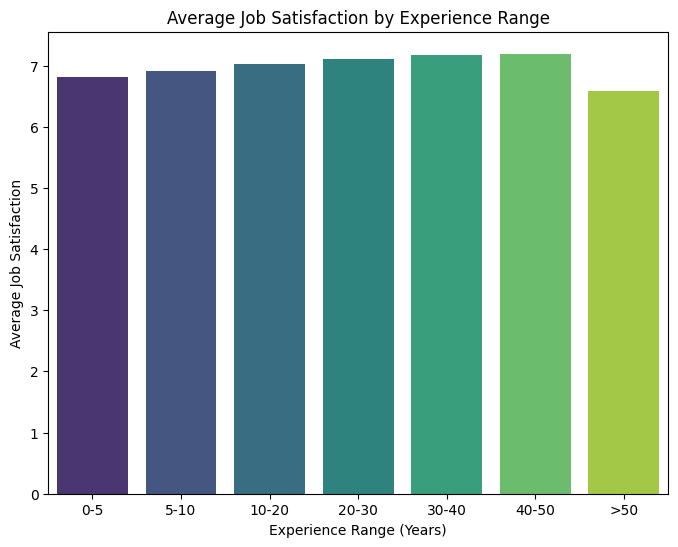

In [8]:
# Calculate the average JobSat for each ExperienceRange
avg_job_satisfaction = df.groupby('ExperienceRange')['JobSat'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=avg_job_satisfaction, palette='viridis')

# Customize the plot
plt.title('Average Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Average Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


In [9]:
# Check unique values in the JobSat column to identify anomalies
print(df['JobSat'].unique())

[ 6.93504086  8.          5.         10.          6.          9.
  4.          7.          3.          2.          1.          0.        ]


/tmp/ipykernel_1679/1715200859.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='viridis')


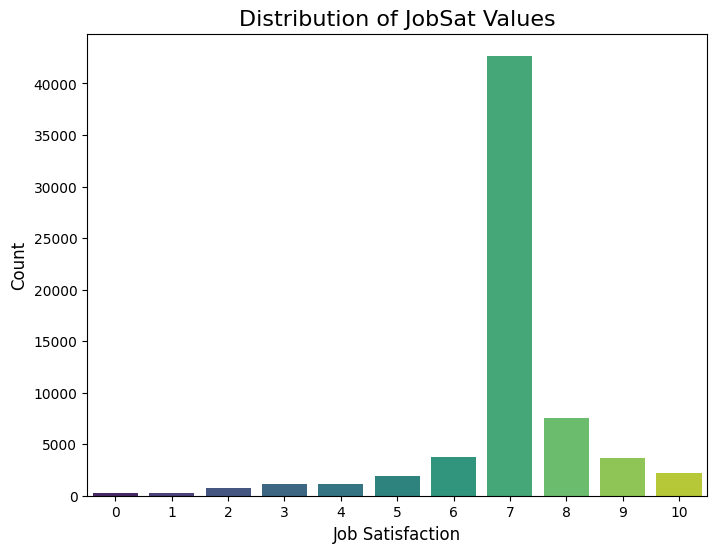

In [10]:
## Write your code here

# Round the JobSat values to the nearest integer
df['JobSat'] = df['JobSat'].round().astype(int)

# Create the count plot again
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSat', palette='viridis')

# Add labels and title
plt.title('Distribution of JobSat Values', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_1679/3926275239.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='Set2')


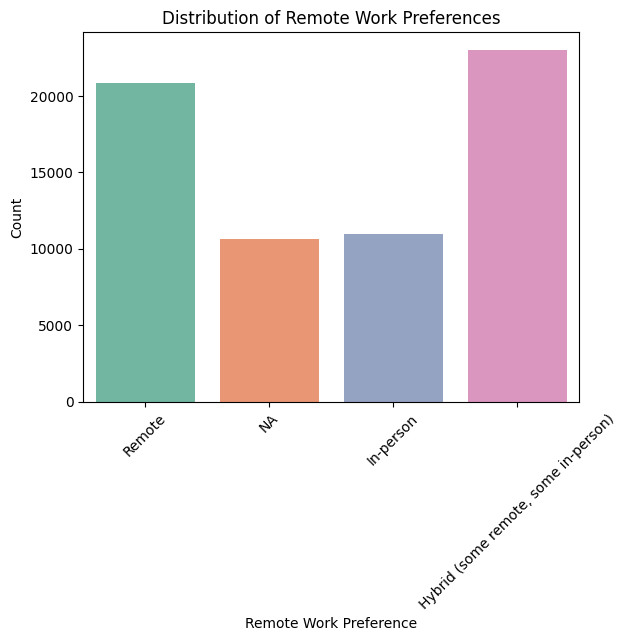

In [11]:
## Write your code here

# Count plot for the distribution of remote work preferences
sns.countplot(data=df, x='RemoteWork', palette='Set2')

# Customize the plot
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [12]:
# Cross-tabulate remote work preferences by employment type and job role
cross_tab = pd.crosstab([df['Employment']], df['RemoteWork'], margins=True, margins_name="Total")

# Display the result
print(cross_tab)

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Retired                                          0   
Student, part-time                                                                     0   
Student, part-time;Employed, part-time                                          

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


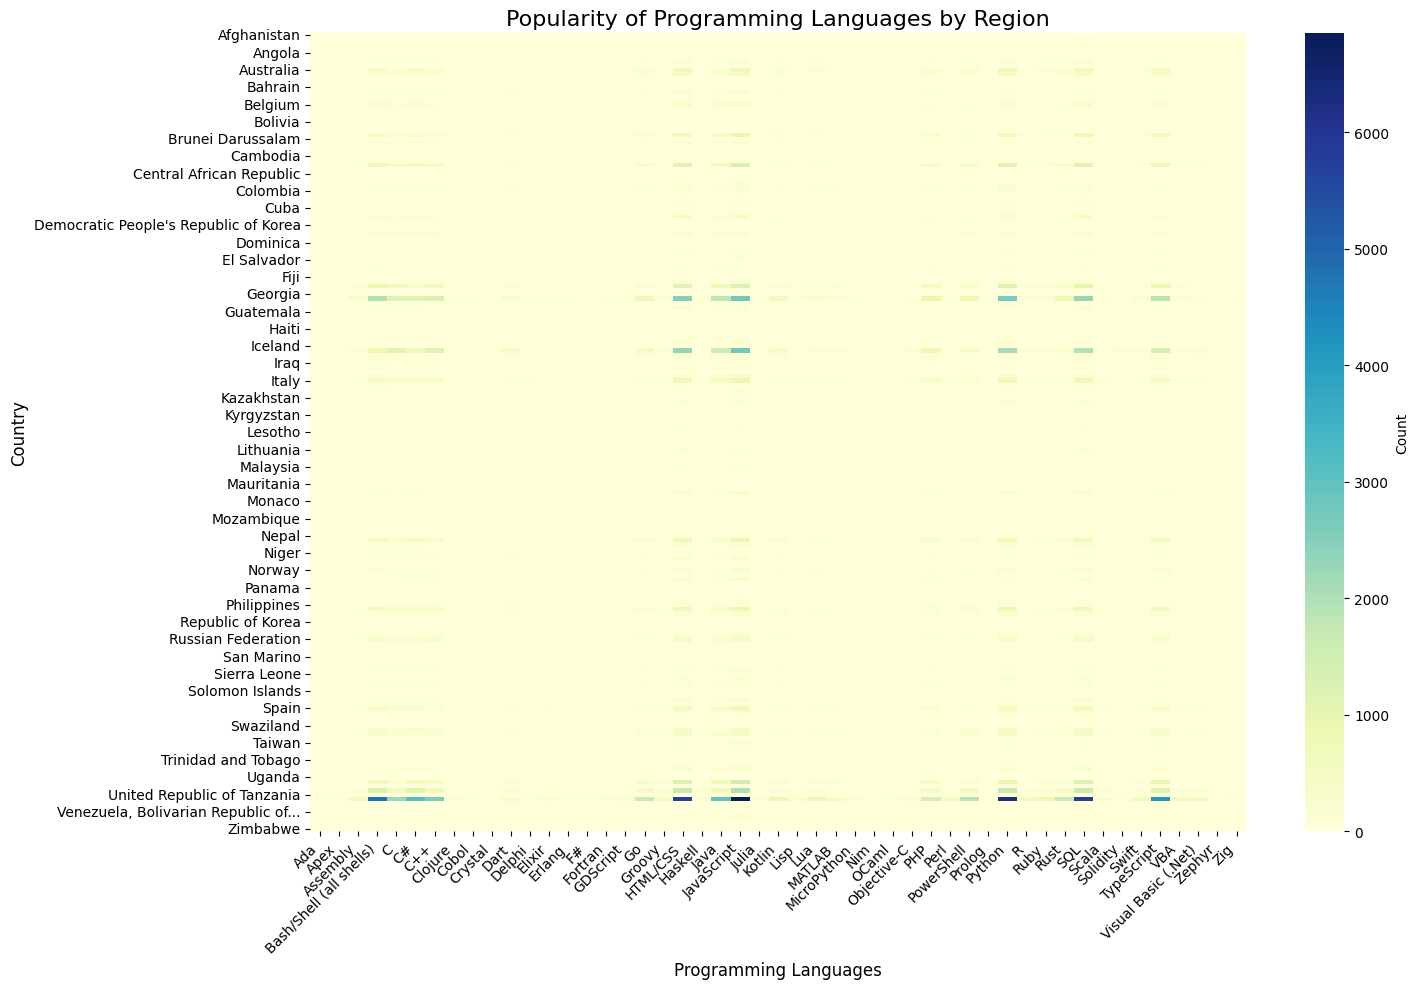

In [17]:
## Write your code here

# Split the 'LanguageHaveWorkedWith' column
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('Languages')  # Explode into individual languages
df_exploded['Languages'] = df_exploded['Languages'].str.strip()  # Remove extra spaces

# Count occurrences of each language per country
language_counts = df_exploded.groupby(['Country', 'Languages']).size().reset_index(name='Count')

# Create a pivot table for the heatmap
heatmap_data = language_counts.pivot(index='Country', columns='Languages', values='Count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Count'})

# Customize the heatmap
plt.title('Popularity of Programming Languages by Region', fontsize=16)
plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


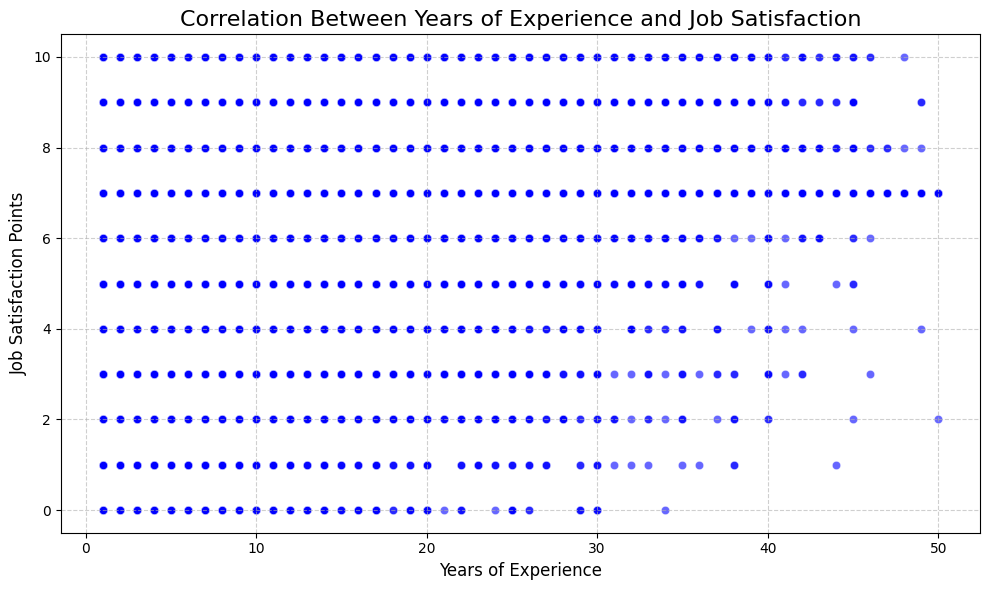

In [31]:
## Write your code here

# Convert 'YearsCodePro' to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Remove rows with NaN values in the relevant columns
df_cleaned = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Calculate the correlation coefficient
correlation = np.corrcoef(df_cleaned['YearsCodePro'], df_cleaned['JobSat'])[0, 1]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='YearsCodePro',
    y='JobSat',
    alpha=0.6,
    color='blue'
)

# Customize the plot
plt.title('Correlation Between Years of Experience and Job Satisfaction', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [44]:
import re

# Remove the text in brackets from the 'EdLevel' column
df['EdLevel'] = df['EdLevel'].apply(lambda x: re.sub(r'\(.*\)', '', str(x)).strip())

# Check the updated unique values in 'EdLevel'
print(df['EdLevel'].unique())

['Primary/elementary school' 'Bachelor’s degree' 'Master’s degree'
 'Some college/university study without earning a degree'
 'Secondary school' 'Professional degree' 'Associate degree'
 'Something else' 'nan']


In [45]:
employment_split = df['Employment'].str.split(';', expand=True)

# Step 2: Restructure the dataframe by melting the employment categories into a single column
df_expanded = employment_split.melt(value_name='Employment').dropna(subset=['Employment'])

# Step 3: Count the unique employment types
employment_counts = df_expanded['Employment'].value_counts()

# Print the count of unique Employment statuses
print(employment_counts)

Employment
Employed, full-time                                     39041
Independent contractor, freelancer, or self-employed     4846
Student, full-time                                       4709
Not employed, but looking for work                       2341
Employed, part-time                                      1266
Not employed, and not looking for work                    633
I prefer not to say                                       546
Retired                                                   525
Student, part-time                                        494
Name: count, dtype: int64


In [46]:
## Write your code here

# Update the 'Employment' column to match the new categories
employment_map = {
    'Employed, full-time': 'Employed, full-time',
    'Independent contractor, freelancer, or self-employed': 'Independent contractor, freelancer, or self-employed',
    'Student, full-time': 'Student, full-time',
    'Employed, part-time': 'Employed, part-time',
    'Not employed, but looking for work': 'Not employed, but looking for work',
    'Student, part-time': 'Student, part-time',
    'Not employed, and not looking for work': 'Not employed, and not looking for work',
    'Retired': 'Retired',
    'I prefer not to say': 'I prefer not to say'
}

df['Employment'] = df['Employment'].map(employment_map)

# Create a cross-tabulation of 'EdLevel' and 'Employment'
education_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'], margins=True, margins_name="Total")

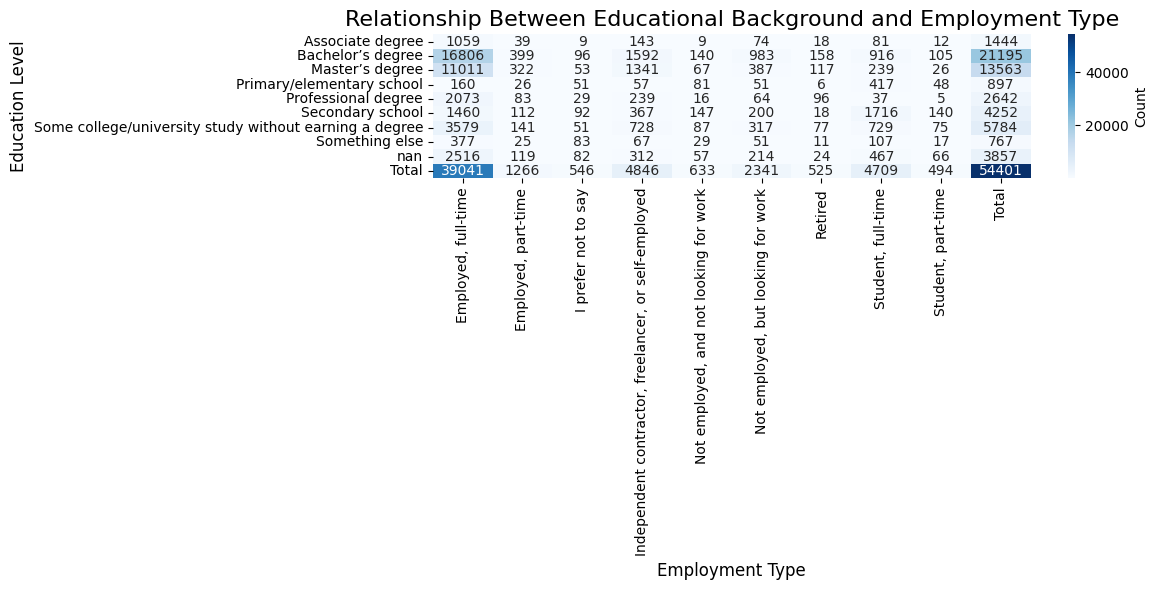

In [47]:
# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(education_employment_crosstab, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Relationship Between Educational Background and Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.tight_layout()

# Show the heatmap
plt.show()

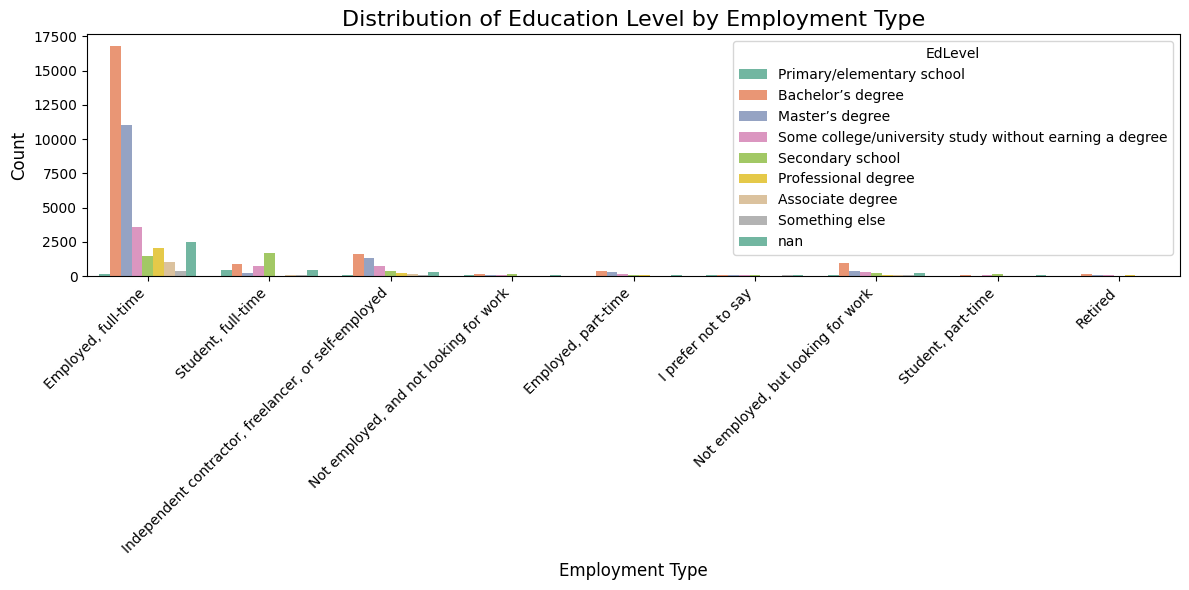

In [48]:
# Plot a bar plot for visualizing distribution of education levels within each employment type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Employment', hue='EdLevel', palette='Set2')
plt.title('Distribution of Education Level by Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the bar plot
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [16]:
## Write your code here

# Save the modified dataset to a CSV file
df.to_csv('Lab - Exploratory Data Analysis_dataset.csv', index=False)

# Optional: Check if the file was saved successfully
print("Dataset saved as 'modified_dataset.csv'")

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
